In [182]:
import pandas as pd
import numpy as np
import json
from datetime import datetime
from matplotlib import pyplot as plt

In [183]:
files = ['CAvideos.csv', 'DEvideos.csv', 'FRvideos.csv', 'GBvideos.csv', 'USvideos.csv']
df_fin = list()
for i in files:
    df_init = pd.read_csv(i)
    df_init['country'] = i[:2]
    df_fin.append(df_init)

vids = pd.concat(df_fin)

In [184]:
#US_vids = pd.read_csv("USvideos.csv")
with open("US_category_id.json", 'r') as f:
    US_cats = json.load(f)
categs = {}
for cats in US_cats['items']:
    categs[cats['id']] = cats['snippet']['title']
for col in ['category_id']:
    vids[col] = vids[col].astype(str)
vids['Category'] = vids['category_id'].map(categs)

In [185]:
count = vids.groupby('Category').count()
categ_count = count['video_id']
categ_count = categ_count.sort_values(ascending = False)
top_10 = {}
for i in range(10):
    top_10[categ_count.index[i]] = categ_count.values[i]

In [186]:
p = {}
l = 0
for i in top_10:
    trend = vids[vids['Category'] == list(top_10)[l]]
    trend = trend.drop_duplicates('video_id')
    
    t = trend.groupby('title').count()
    trend['publish_time'] = trend['publish_time'].str[2:10]
    trend['publish_year'] = trend['publish_time'].str[:2]
    trend['publish_month'] = trend['publish_time'].str[3:5]
    trend['publish_day'] = trend['publish_time'].str[6:]
    trend['trending_year'] = trend['trending_date'].str[:2]
    trend['trending_day'] = trend['trending_date'].str[3:5]
    trend['trending_month'] = trend['trending_date'].str[6:]

    year = (pd.to_numeric(trend['trending_year']) - pd.to_numeric(trend['publish_year'])) * 365
    month = (pd.to_numeric(trend['trending_month']) - pd.to_numeric(trend['publish_month'])) * 30
    day = pd.to_numeric(trend['trending_day']) - pd.to_numeric(trend['publish_day'])
    trend['time_to_trend'] = year + month + day
    trend['trending'] = trend['trending_day'] + "-" + trend['trending_month'] + "-20" + trend['trending_year']
    trend['publish'] = trend['publish_day'] + "-" + trend['publish_month'] + "-20" + trend['publish_year']
    p[i] = pd.concat([trend['video_id'], trend['publish'], trend['trending'], trend['time_to_trend']], axis = 1)
    l += 1

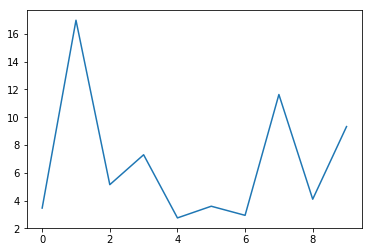

In [187]:
ttt = []
for i in p:
    ttt.append(p[i]['time_to_trend'].mean())
plt.plot(ttt)

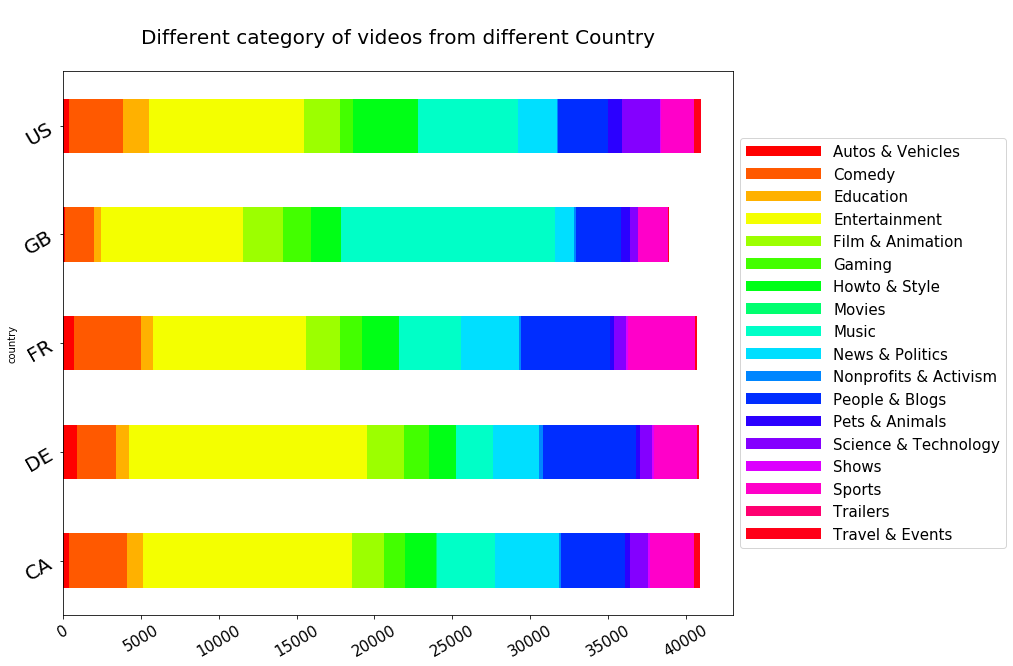

In [188]:
vids.groupby(["country", "Category"]).count()["video_id"].unstack().plot.barh(figsize=(12,10), stacked=True, cmap = "hsv")
plt.yticks(rotation=30, fontsize=20) 
plt.xticks(rotation=30, fontsize=15) 
plt.title("\nDifferent category of videos from different Country\n", fontsize=20)
plt.legend(handlelength = 5, fontsize = 15, loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

[Text(0,0,''),
 Text(0,0,'CA'),
 Text(0,0,'DE'),
 Text(0,0,'FR'),
 Text(0,0,'GB'),
 Text(0,0,'US')]

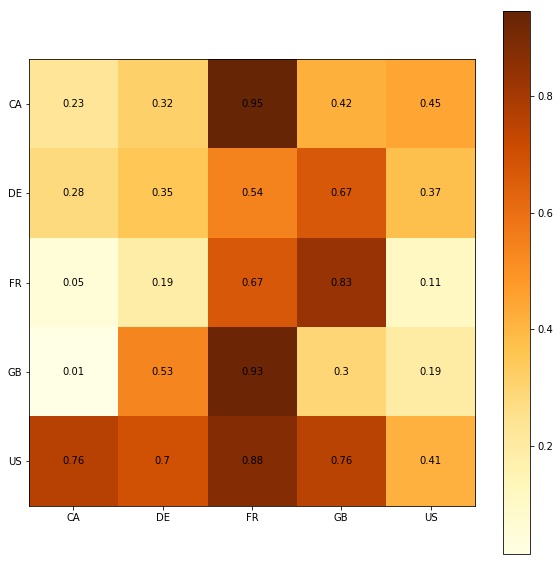

In [189]:
X = np.random.uniform(0, 1, (5, 5))
fig, ax = plt.subplots(figsize = (10, 10))
hmap = ax.imshow(X, cmap = 'YlOrBr', interpolation = 'nearest')
labs = ['']
countries = ['CA', 'DE', 'FR', 'GB', 'US']
cbar = fig.colorbar(hmap)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        text = ax.text(j, i, round(X[i, j], 2), ha = "center", va = "center", color = "black")
for i in countries:
    labs.append(i)
ax.set_yticklabels(labs)
ax.set_xticklabels(labs)